#Setup

In [1]:
qwe=0

In [2]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
import pathlib
dir_path = "image/train"
data_root = pathlib.Path(dir_path)
print(data_root)

image/train


In [4]:
import cv2

In [5]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam_v2
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
if qwe==0:
    vggmodel = ResNet50(weights='imagenet', include_top=True)
else:
    vggmodel = VGG16(weights='imagenet', include_top=True)

#Resnet

In [6]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(vggmodel.input,predictions)

In [7]:
if qwe==0:
    model_final= tf.keras.models.load_model('models/my_model_ressnet.h5')
else:
    model_final= tf.keras.models.load_model('models/my_model_vgg.h5')

In [8]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()


In [9]:
def inference(path_name):
  save_cord= []
  img = cv2.imread(path_name)        
  ss.setBaseImage(img)
  ss.switchToSelectiveSearchFast()
  ssresults = ss.process()
  imout = img.copy()
  for e,result in enumerate(ssresults):
      if e < 2000:
          x,y,w,h = result
          timage = imout[y:y+h,x:x+w]
          resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
          img = np.expand_dims(resized, axis=0)
          out= model_final.predict(img)
          if out[0][0] > 0.90:
              
              cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
  plt.figure()
  plt.imshow(imout)

In [10]:
ls

data/  Dump/  images/  models/  sample_data/


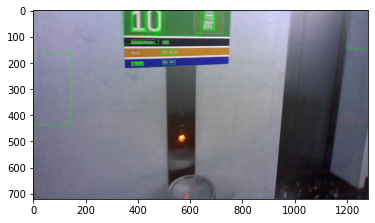

In [11]:
inference("images/img_1.jpg")

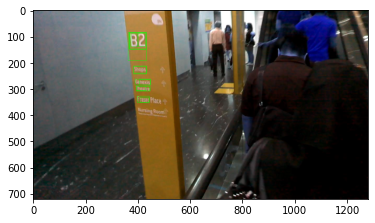

In [12]:
inference("images/img_11.jpg")

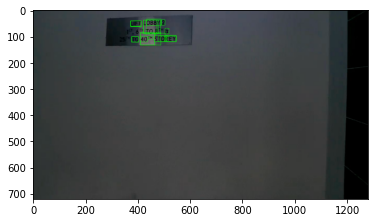

In [13]:
inference("images/img_16.jpg")

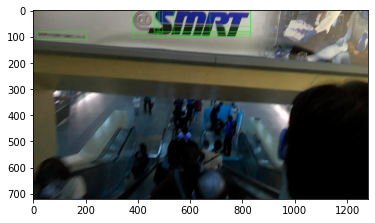

In [14]:
inference("images/img_28.jpg")

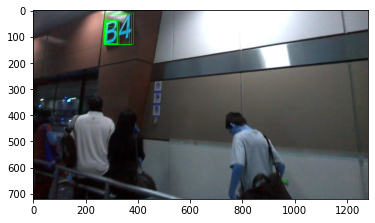

In [15]:
inference("images/img_45.jpg")

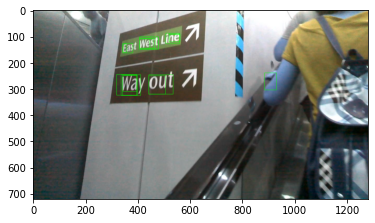

In [16]:
inference("images/img_56.jpg")

In [17]:
data_folder = "images/"
random_dic=os.listdir(data_folder)

In [18]:
#this is make cordinates
all_img=[]
for i in range(len(os.listdir(data_folder))):
  if random_dic[i]!="gt" and random_dic[i]!='.ipynb_checkpoints':
  
  
    save_cord= []
    all_cord=[]
    
    img = cv2.imread("images/"+str(random_dic[i]))
    print(img)

          
    ss.setBaseImage(img)

    ss.switchToSelectiveSearchFast()
    ssresults = ss.process()
    imout = img.copy()
    for e,result in enumerate(ssresults):
        if e < 2000:
            x,y,w,h = result
            timage = imout[y:y+h,x:x+w]
            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
            img = np.expand_dims(resized, axis=0)
            out= model_final.predict(img)
            if out[0][0] > 0.90:
                #print("*")
                for i in range(len(result)):
                  if i==0 or i==1:
                    all_cord.append(result[i])
                  elif i==2:
                    all_cord.append(result[i]+result[0])
                  elif i==3:
                    all_cord.append(result[i]+result[1])
                save_cord.append(all_cord)
                all_cord=[]
                cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
    all_img.append(save_cord)   

[[[117 120 111]
  [116 119 110]
  [118 119 110]
  ...
  [124 135 149]
  [123 134 148]
  [123 134 148]]

 [[117 120 111]
  [116 119 110]
  [118 119 110]
  ...
  [120 131 145]
  [119 130 144]
  [118 129 143]]

 [[117 120 111]
  [116 119 110]
  [118 119 110]
  ...
  [115 126 140]
  [113 124 138]
  [111 122 136]]

 ...

 [[ 19  23  24]
  [ 19  23  24]
  [ 19  23  24]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 17  22  25]
  [ 17  22  25]
  [ 18  23  26]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 16  21  24]
  [ 17  22  25]
  [ 18  23  26]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
[[[ 59  72  80]
  [ 59  72  80]
  [ 59  72  80]
  ...
  [136 134 140]
  [136 134 140]
  [136 134 140]]

 [[ 59  72  80]
  [ 59  72  80]
  [ 59  72  80]
  ...
  [136 134 140]
  [136 134 140]
  [136 134 140]]

 [[ 61  72  80]
  [ 61  72  80]
  [ 61  72  80]
  ...
  [135 133 139]
  [138 134 140]
  [138 134 140]]

 ...

 [[  3   0   2]
  [  1   0   2]
  [  3   0   2]
  ..

!@#
something went wrong 
!@#
something went wrong 
!@#
something went wrong 
!@#


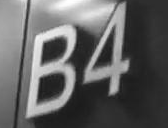

!@#


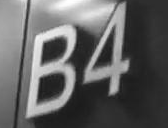

!@#


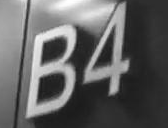

!@#


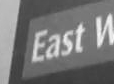

!@#


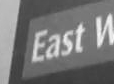

!@#


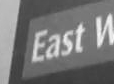

!@#


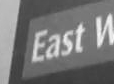

!@#


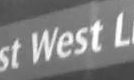

!@#


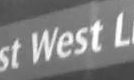

!@#


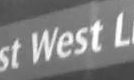

!@#


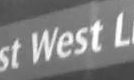

!@#


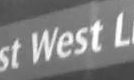

!@#


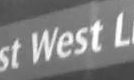

!@#


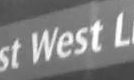

!@#


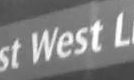

!@#


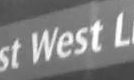

!@#


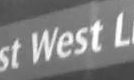

!@#


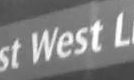

!@#


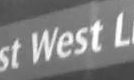

!@#


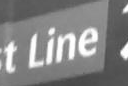

!@#


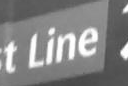

!@#


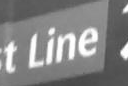

!@#


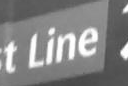

!@#


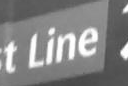

!@#


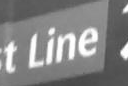

!@#


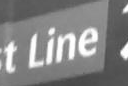

!@#


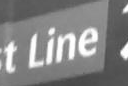

!@#


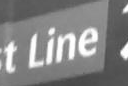

!@#


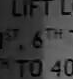

!@#
!@#


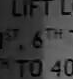

!@#


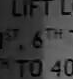

!@#


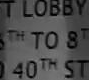

!@#
!@#


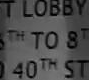

!@#


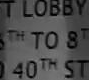

!@#


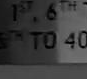

!@#


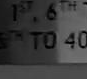

!@#


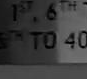

!@#


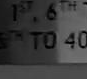

!@#


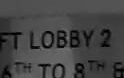

!@#
!@#


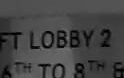

!@#


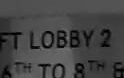

!@#


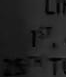

!@#
!@#


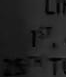

!@#


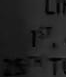

!@#


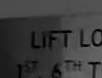

!@#
!@#


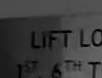

!@#


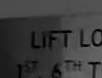

!@#


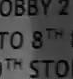

!@#
!@#


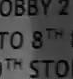

!@#


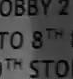

!@#


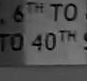

!@#


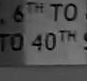

!@#


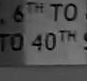

!@#


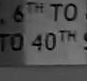

!@#


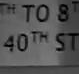

!@#


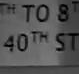

!@#


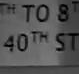

!@#


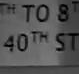

!@#


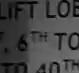

!@#
!@#


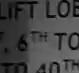

!@#


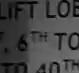

!@#


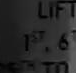

!@#
!@#


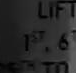

!@#


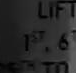

!@#


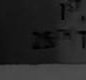

!@#


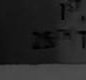

!@#


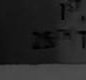

!@#


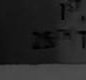

!@#


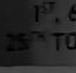

!@#


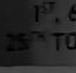

!@#


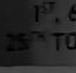

!@#


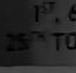

IndexError: ignored

In [31]:
import math
import cv2
from google.colab.patches import cv2_imshow#commnet this if you are not using colab
     

holder = 0 
data_folder = "./images"
for p in range(len(os.listdir('./images'))):
    path_og= random_dic[p]

    
    save_cord=all_img[holder]
    holder+=1
    
    for path in os.listdir(data_folder):
        #new=path.split('.')
        
        #if holder==2:
          #break
        
        if path!="gt" and path!='.ipynb_checkpoints':
            
            val=path.split(".jpg")
           

            file1 = open('images/gt/gt_'+val[0]+'.txt', 'r')
            #file1 = open('image/test-txt/gt_img_20.txt', 'r')


            Lines = file1.readlines()

            for each in range(len(Lines)):
              val2=Lines[each].split(",")


              for i in save_cord:
                #print(path)
                if math.isclose(int(val2[0]),int(i[0]) , abs_tol = 100) and path==path_og:


                  if math.isclose(int(val2[1]),int(i[1]) , abs_tol = 100):



                    if math.isclose(int(val2[4]),int(i[2]) , abs_tol = 100):

                      print("!@#")

                      if math.isclose(int(val2[5]),int(i[3]) , abs_tol = 100):

                        x=int(val2[1])
                        y=int(val2[5])
                        n=int(val2[0])
                        z=int(val2[4])


                        try:
                          #print(path)

                          if path==path_og:

                            #print(path)
                            #print(main_file)
                            #print()

                            img = cv2.imread('images/'+path)
                            #print('image/test/'+path)
                            #cv2_imshow(img)

                            crop_img = img[x-30:y+30,n-30:z+30]
                            sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
                            
                            sharpen = cv2.filter2D(crop_img, -1, sharpen_kernel)
                            
                            grayscale = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
                            #########################################
                            #change this block of code depending where you are using coloab or anaconda
                            cv2_imshow(grayscale)#for colab
                            #cv2.imshow('test',grayscale)#for anaconda

                            ##########################################
                            string = val2[8].strip('\n')
                            os.chdir("Dump")
                            bee= string+'.jpg'
                            cv2.imwrite(bee,grayscale)
                            os.chdir("../")
                        except:
                            print("something went wrong ")

In [ ]:
#go to dump folder and you you will see your croped images 

